<h2><a href="https://leetcode.com/problems/minimize-malware-spread-ii/">928. Minimize Malware Spread II</a></h2><h3>Hard</h3><hr><p>You are given a network of <code>n</code> nodes represented as an <code>n x n</code> adjacency matrix <code>graph</code>, where the <code>i<sup>th</sup></code> node is directly connected to the <code>j<sup>th</sup></code> node if <code>graph[i][j] == 1</code>.</p>

<p>Some nodes <code>initial</code> are initially infected by malware. Whenever two nodes are directly connected, and at least one of those two nodes is infected by malware, both nodes will be infected by malware. This spread of malware will continue until no more nodes can be infected in this manner.</p>

<p>Suppose <code>M(initial)</code> is the final number of nodes infected with malware in the entire network after the spread of malware stops.</p>

<p>We will remove <strong>exactly one node</strong> from <code>initial</code>, <strong>completely removing it and any connections from this node to any other node</strong>.</p>

<p>Return the node that, if removed, would minimize <code>M(initial)</code>. If multiple nodes could be removed to minimize <code>M(initial)</code>, return such a node with <strong>the smallest index</strong>.</p>

<p>&nbsp;</p>
<p><strong class="example">Example 1:</strong></p>
<pre><strong>Input:</strong> graph = [[1,1,0],[1,1,0],[0,0,1]], initial = [0,1]
<strong>Output:</strong> 0
</pre><p><strong class="example">Example 2:</strong></p>
<pre><strong>Input:</strong> graph = [[1,1,0],[1,1,1],[0,1,1]], initial = [0,1]
<strong>Output:</strong> 1
</pre><p><strong class="example">Example 3:</strong></p>
<pre><strong>Input:</strong> graph = [[1,1,0,0],[1,1,1,0],[0,1,1,1],[0,0,1,1]], initial = [0,1]
<strong>Output:</strong> 1
</pre>
<p>&nbsp;</p>
<p><strong>Constraints:</strong></p>

<ul>
	<li><code>n == graph.length</code></li>
	<li><code>n == graph[i].length</code></li>
	<li><code>2 &lt;= n &lt;= 300</code></li>
	<li><code>graph[i][j]</code> is <code>0</code> or <code>1</code>.</li>
	<li><code>graph[i][j] == graph[j][i]</code></li>
	<li><code>graph[i][i] == 1</code></li>
	<li><code>1 &lt;= initial.length &lt;&nbsp;n</code></li>
	<li><code>0 &lt;= initial[i] &lt;= n - 1</code></li>
	<li>All the integers in <code>initial</code> are <strong>unique</strong>.</li>
</ul>


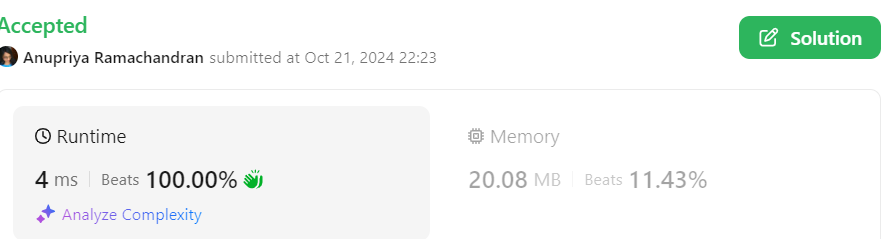

In [1]:
from typing import List

class Solution:
    def dfs(self, graph, curnode, parent, curtime, discoverytime, low, isinfected, malwarespreadcount):
        low[curnode] = discoverytime[curnode] = curtime
        ismalwarespread = isinfected[curnode]
        componentsize = 1

        for neighbor in range(len(graph[curnode])):
            if graph[curnode][neighbor] == 1:
                if discoverytime[neighbor] == 0:
                    subtreesize = self.dfs(graph, neighbor, curnode, curtime + 1, discoverytime, low, isinfected, malwarespreadcount)

                    if subtreesize == 0:
                        ismalwarespread = True
                    else:
                        componentsize += subtreesize

                    if low[neighbor] >= discoverytime[curnode]:
                        malwarespreadcount[curnode] += subtreesize

                    low[curnode] = min(low[curnode], low[neighbor])
                elif parent != neighbor:
                    low[curnode] = min(low[curnode], discoverytime[neighbor])

        return 0 if ismalwarespread else componentsize


    def minMalwareSpread(self, graph: List[List[int]], initial: List[int]) -> int:
        rows, cols = len(graph), len(graph[0])
        discoverytime= [0] * rows
        low = [0]* rows
        malwarespreadcount = [0] * rows
        maxsavednodes = 0
        nodetoremove = initial[0]

        isinfected = [False]* rows
        for node in initial:
            isinfected[node] = True

        for node in initial:
            if discoverytime[node] == 0:
                self.dfs(graph, node, -1, 1, discoverytime, low,isinfected,  malwarespreadcount)
            if malwarespreadcount[node] > maxsavednodes or (malwarespreadcount[node]== maxsavednodes and node < nodetoremove):
                maxsavednodes = malwarespreadcount[node]
                nodetoremove = node

        return nodetoremove